In [1]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

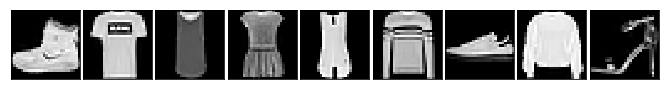

In [3]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
model = Sequential()

# 28x28x1
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer='he_normal', input_shape=(28, 28, 1)))
# 24x24x16
model.add(MaxPooling2D(pool_size=(2, 2)))
# 12x12x16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', 
                 kernel_initializer='he_normal'))
# 8x8x64
model.add(MaxPooling2D(pool_size=(2, 2)))
# 4x4x64
model.add(Flatten())
# 1024
model.add(Dense(10, activation='softmax'))
# 10

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          25664     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 36,330
Trainable params: 36,330
Non-trainable params: 0
_________________________________________________________________


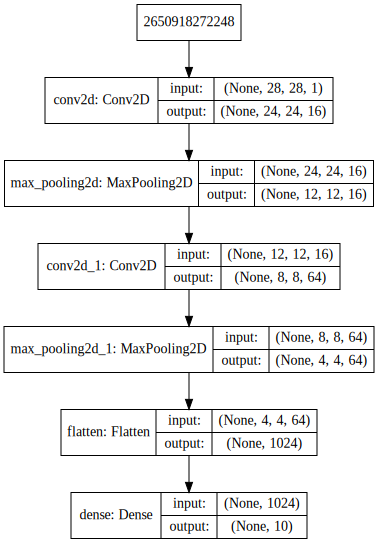

In [9]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x_train, y_train,
          batch_size=128, epochs=100, verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5449 - acc: 0.8078 - val_loss: 0.4308 - val_acc: 0.8449
Epoch 2/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3562 - acc: 0.8742 - val_loss: 0.3452 - val_acc: 0.8758
Epoch 3/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3072 - acc: 0.8891 - val_loss: 0.3204 - val_acc: 0.8828
Epoch 4/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2779 - acc: 0.9001 - val_loss: 0.2999 - val_acc: 0.8919
Epoch 5/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2553 - acc: 0.9076 - val_loss: 0.2968 - val_acc: 0.8937
Epoch 6/100
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2397 - acc: 0.9139 - val_loss: 0.2881 - val_acc: 0.8977
Epoch 7/100
60000/60000 [==============================] - 3s 

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27522476626634595
Test accuracy: 0.9035
